In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [89]:
data = pd.read_csv("train.csv")
test = pd.read_csv("validation.csv")
data.head()
data.shape

(4732, 109)

In [90]:
data.isnull().sum()

Unnamed: 0            0
USER_ID               0
YOB                 281
Gender               98
Income              885
HouseholdStatus     389
EducationLevel      735
Q124742            2929
Q124122            2092
Q123464            1963
Q123621            2027
Q122769            1888
Q122770            1770
Q122771            1759
Q122120            1741
Q121699            1567
Q121700            1596
Q120978            1577
Q121011            1545
Q120379            1600
Q120650            1540
Q120472            1636
Q120194            1757
Q120012            1588
Q120014            1726
Q119334            1684
Q119851            1521
Q119650            1635
Q118892            1508
Q118117            1583
                   ... 
Q106388            1910
Q106389            1959
Q106042            1884
Q105840            1961
Q105655            1773
Q104996            1798
Q103293            1802
Q102906            1904
Q102674            1954
Q102687            1844
Q102289         

In [91]:
test.isnull().sum()

Unnamed: 0           0
USER_ID              0
YOB                 52
Gender              15
Income             143
HouseholdStatus     61
EducationLevel     131
Q124742            524
Q124122            379
Q123464            342
Q123621            372
Q122769            317
Q122770            293
Q122771            288
Q122120            293
Q121699            257
Q121700            265
Q120978            272
Q121011            264
Q120379            278
Q120650            272
Q120472            305
Q120194            311
Q120012            277
Q120014            321
Q119334            280
Q119851            258
Q119650            271
Q118892            248
Q118117            279
                  ... 
Q106388            335
Q106389            340
Q106042            322
Q105840            327
Q105655            309
Q104996            302
Q103293            318
Q102906            345
Q102674            327
Q102687            316
Q102289            325
Q102089            318
Q101162    

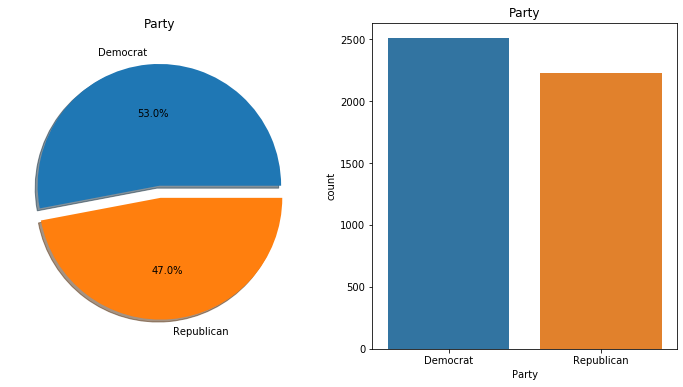

In [92]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data['Party'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Party')
ax[0].set_ylabel('')
sns.countplot('Party',data=data,ax=ax[1])
ax[1].set_title('Party')
plt.show()

In [93]:
data.groupby(['Gender','Party'])['Party'].count()

Gender  Party     
Female  Democrat      1082
        Republican     747
Male    Democrat      1370
        Republican    1435
Name: Party, dtype: int64

In [94]:
#After dealing with NA values
#data = pd.get_dummies(data)
#data.head()

# Exploring Questions

Here we have explored different questions and checked how much it would affect the decision of giving vote for a particular person.

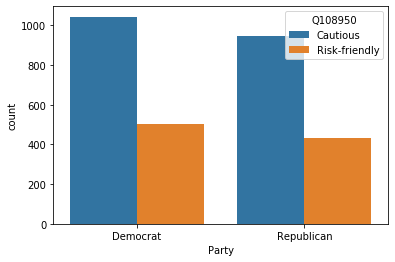

In [95]:
#cautious or riskfriendly
sns.countplot(x='Party',hue='Q108950',data=data)

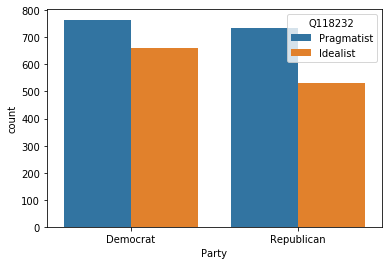

In [96]:
#idealist or pragmatist
sns.countplot(x='Party',hue='Q118232',data=data)

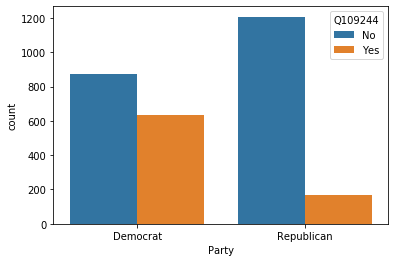

In [97]:
#feminist
sns.countplot(x='Party',hue='Q109244',data=data)

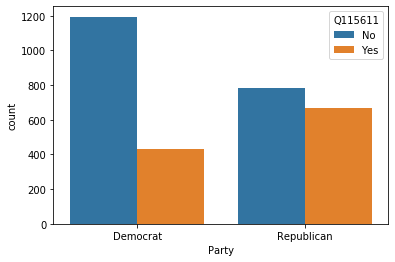

In [98]:
#own a gun
sns.countplot(x='Party',hue='Q115611',data=data)

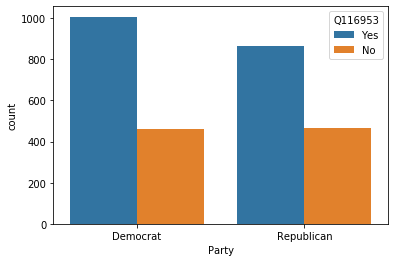

In [99]:
#rules
sns.countplot(x='Party',hue='Q116953',data=data)

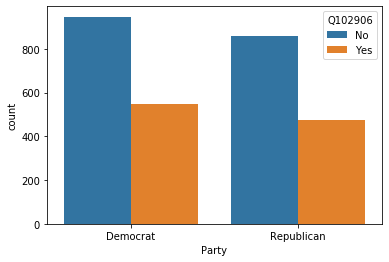

In [100]:
#grudge
sns.countplot(x='Party',hue='Q102906',data=data)

In [101]:
pd.crosstab([data.Gender,data.Party],data.HouseholdStatus,margins=True).style.background_gradient(cmap='summer_r')

In [102]:
data.groupby(['HouseholdStatus','Party'])['Party'].count()

HouseholdStatus              Party     
Domestic Partners (no kids)  Democrat       115
                             Republican      42
Domestic Partners (w/kids)   Democrat        32
                             Republican      24
Married (no kids)            Democrat       294
                             Republican     270
Married (w/kids)             Democrat       624
                             Republican     715
Single (no kids)             Democrat      1145
                             Republican     912
Single (w/kids)              Democrat       102
                             Republican      68
Name: Party, dtype: int64

In [103]:
data.groupby(['YOB','Party'])['Party'].count()

YOB     Party     
1880.0  Republican      1
1881.0  Republican      1
1896.0  Democrat        1
1900.0  Democrat        2
        Republican      1
1901.0  Democrat        1
1928.0  Democrat        1
1931.0  Republican      1
1933.0  Republican      4
1935.0  Democrat        1
        Republican      1
1936.0  Republican      2
1937.0  Democrat        1
        Republican      1
1938.0  Democrat        4
        Republican      1
1939.0  Republican      4
1940.0  Democrat        7
        Republican      5
1941.0  Democrat        6
        Republican      4
1942.0  Democrat        8
        Republican      5
1943.0  Democrat        7
        Republican      7
1944.0  Democrat        7
        Republican      8
1945.0  Democrat       10
        Republican      6
1946.0  Democrat       10
                     ... 
1989.0  Democrat       62
        Republican     37
1990.0  Democrat       74
        Republican     59
1991.0  Democrat       52
        Republican     42
1992.0  Democrat   

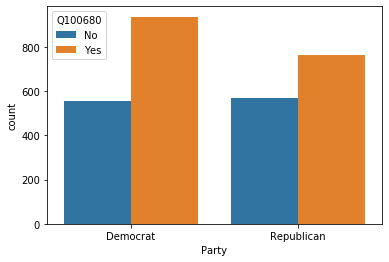

In [104]:
#cried
sns.countplot(x='Party',hue='Q100680',data=data)

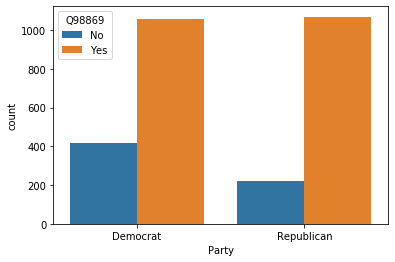

In [105]:
sns.countplot(x='Party',hue='Q98869',data=data)

# Started Modelling

Here we started modelling our ML model. We have considered columns such as user_id, yob, gender, Q109244, Q115611, Q118232, Q113181, Q110740, Party and tried to fit it in our model.

We selected these columns because we found this most suitable from the above visualizations.

In [106]:
col_list = ["USER_ID", "YOB", "Gender", "HouseholdStatus", "Q109244", "Q115611", "Q118232", "Q113181", "Q110740", "Party"]
new_data = data[col_list]

In [107]:
test_col_list = ["USER_ID", "YOB", "Gender", "HouseholdStatus", "Q109244", "Q115611", "Q118232", "Q113181", "Q110740", "Party"]
new_test = test[col_list] 

In [108]:
new_data.shape

(4732, 10)

In [109]:
new_data.head()

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party
0,1295,1971.0,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat
1,3324,1981.0,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican
2,6939,1999.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997.0,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat
4,3341,1977.0,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat


In [110]:
new_test.head()

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party
0,1445,1981.0,Male,Married (w/kids),No,No,Idealist,No,Mac,Republican
1,946,1990.0,Male,Single (no kids),NaN,NaN,NaN,No,NaN,Democrat
2,588,1990.0,Female,Single (no kids),Yes,No,Pragmatist,Yes,PC,Democrat
3,1385,1999.0,Male,NaN,No,No,Idealist,Yes,Mac,Democrat
4,6713,1990.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Republican


In [111]:
new_data['YOB'] = data.YOB.fillna(data.YOB.median())
new_test['YOB'] = new_test.YOB.fillna(new_test.YOB.median())

In [112]:
new_data

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party
0,1295,1971.0,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat
1,3324,1981.0,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican
2,6939,1999.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997.0,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat
4,3341,1977.0,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat
5,4949,1994.0,Male,Single (no kids),NaN,No,Pragmatist,No,PC,Republican
6,1467,1949.0,Female,Married (no kids),No,Yes,Pragmatist,No,PC,Democrat
7,894,1989.0,Female,Single (no kids),No,NaN,Pragmatist,NaN,NaN,Democrat
8,857,1989.0,Female,Domestic Partners (no kids),No,No,Idealist,Yes,PC,Democrat
9,4496,1994.0,Male,Single (no kids),No,No,Pragmatist,No,PC,Republican


In [113]:
new_test

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party
0,1445,1981.0,Male,Married (w/kids),No,No,Idealist,No,Mac,Republican
1,946,1990.0,Male,Single (no kids),NaN,NaN,NaN,No,NaN,Democrat
2,588,1990.0,Female,Single (no kids),Yes,No,Pragmatist,Yes,PC,Democrat
3,1385,1999.0,Male,NaN,No,No,Idealist,Yes,Mac,Democrat
4,6713,1990.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Republican
5,1784,1987.0,Female,Single (no kids),No,No,Idealist,No,PC,Republican
6,6433,1982.0,Female,Single (no kids),NaN,NaN,Pragmatist,NaN,NaN,Democrat
7,765,1993.0,Male,Single (no kids),NaN,Yes,Pragmatist,Yes,Mac,Republican
8,293,1987.0,Female,Single (no kids),No,No,Pragmatist,No,PC,Democrat
9,1147,1976.0,Female,Married (w/kids),Yes,NaN,Pragmatist,Yes,PC,Democrat


In [114]:
new_data.head()

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party
0,1295,1971.0,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat
1,3324,1981.0,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican
2,6939,1999.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997.0,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat
4,3341,1977.0,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat


In [115]:
new_data.isnull().sum()

USER_ID               0
YOB                   0
Gender               98
HouseholdStatus     389
Q109244            1847
Q115611            1656
Q118232            2039
Q113181            1760
Q110740            1690
Party                 0
dtype: int64

In [116]:
new_data['Age'] = new_data['YOB'].apply(lambda x: 2018-x)
new_test['Age'] = new_test['YOB'].apply(lambda x: 2018-x)

In [117]:
new_data.head()

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1295,1971.0,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat,47.0
1,3324,1981.0,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican,37.0
2,6939,1999.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat,19.0
3,1525,1997.0,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat,21.0
4,3341,1977.0,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat,41.0


In [118]:
new_test.head()

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1445,1981.0,Male,Married (w/kids),No,No,Idealist,No,Mac,Republican,37.0
1,946,1990.0,Male,Single (no kids),NaN,NaN,NaN,No,NaN,Democrat,28.0
2,588,1990.0,Female,Single (no kids),Yes,No,Pragmatist,Yes,PC,Democrat,28.0
3,1385,1999.0,Male,NaN,No,No,Idealist,Yes,Mac,Democrat,19.0
4,6713,1990.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Republican,28.0


In [119]:
new_data = new_data.drop("YOB", axis=1)
new_test = new_test.drop("YOB", axis=1)

In [120]:
new_data.head()

,USER_ID,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1295,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat,47.0
1,3324,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican,37.0
2,6939,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat,19.0
3,1525,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat,21.0
4,3341,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat,41.0


In [121]:
new_test.head()

,USER_ID,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1445,Male,Married (w/kids),No,No,Idealist,No,Mac,Republican,37.0
1,946,Male,Single (no kids),NaN,NaN,NaN,No,NaN,Democrat,28.0
2,588,Female,Single (no kids),Yes,No,Pragmatist,Yes,PC,Democrat,28.0
3,1385,Male,NaN,No,No,Idealist,Yes,Mac,Democrat,19.0
4,6713,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Republican,28.0


In [122]:
new_data.loc[ new_data['Age'] <= 16, 'Age'] = 0
new_data.loc[(new_data['Age'] > 16) & (new_data['Age'] <= 32), 'Age'] = 1
new_data.loc[(new_data['Age'] > 32) & (new_data['Age'] <= 48), 'Age'] = 2
new_data.loc[(new_data['Age'] > 48) & (new_data['Age'] <= 64), 'Age'] = 3
new_data.loc[ new_data['Age'] > 64, 'Age'] = 4;

In [123]:
new_data.head()

,USER_ID,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1295,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat,2.0
1,3324,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican,2.0
2,6939,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat,1.0
3,1525,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat,1.0
4,3341,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat,2.0


In [124]:
new_test.loc[ new_test['Age'] <= 16, 'Age'] = 0
new_test.loc[(new_test['Age'] > 16) & (new_test['Age'] <= 32), 'Age'] = 1
new_test.loc[(new_test['Age'] > 32) & (new_test['Age'] <= 48), 'Age'] = 2
new_test.loc[(new_test['Age'] > 48) & (new_test['Age'] <= 64), 'Age'] = 3
new_test.loc[ new_test['Age'] > 64, 'Age'] = 4;

In [125]:
new_test.head()

,USER_ID,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1445,Male,Married (w/kids),No,No,Idealist,No,Mac,Republican,2.0
1,946,Male,Single (no kids),NaN,NaN,NaN,No,NaN,Democrat,1.0
2,588,Female,Single (no kids),Yes,No,Pragmatist,Yes,PC,Democrat,1.0
3,1385,Male,NaN,No,No,Idealist,Yes,Mac,Democrat,1.0
4,6713,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Republican,1.0


In [126]:
new_data = new_data.dropna()
new_test = new_test.dropna()

In [127]:
new_data.shape

(1741, 10)

In [128]:
new_test.shape

(308, 10)

In [129]:
new_data = pd.get_dummies(new_data)
new_data.head()

,USER_ID,Age,Gender_Female,Gender_Male,HouseholdStatus_Domestic Partners (no kids),HouseholdStatus_Domestic Partners (w/kids),HouseholdStatus_Married (no kids),HouseholdStatus_Married (w/kids),HouseholdStatus_Single (no kids),HouseholdStatus_Single (w/kids),...,Q115611_No,Q115611_Yes,Q118232_Idealist,Q118232_Pragmatist,Q113181_No,Q113181_Yes,Q110740_Mac,Q110740_PC,Party_Democrat,Party_Republican
0,1295,2.0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,1,0
3,1525,1.0,0,1,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0
4,3341,2.0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
6,1467,4.0,1,0,0,0,1,0,0,0,...,0,1,0,1,1,0,0,1,1,0
8,857,1.0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,0


In [130]:
new_test = pd.get_dummies(new_test)
new_test.head()

,USER_ID,Age,Gender_Female,Gender_Male,HouseholdStatus_Domestic Partners (no kids),HouseholdStatus_Domestic Partners (w/kids),HouseholdStatus_Married (no kids),HouseholdStatus_Married (w/kids),HouseholdStatus_Single (no kids),HouseholdStatus_Single (w/kids),...,Q115611_No,Q115611_Yes,Q118232_Idealist,Q118232_Pragmatist,Q113181_No,Q113181_Yes,Q110740_Mac,Q110740_PC,Party_Democrat,Party_Republican
0,1445,2.0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
2,588,1.0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,1,1,0
5,1784,1.0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
8,293,1.0,1,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,1,1,0
10,3998,1.0,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1


In [131]:
new_data = new_data.drop("Party_Democrat", axis = 1)

In [132]:
new_test = new_test.drop("Party_Democrat", axis = 1)

In [133]:
x_train = new_data.drop("Party_Republican", axis=1)
y_train = new_data['Party_Republican']

x_test = new_test.drop("Party_Republican", axis=1)
y_test = new_test['Party_Republican']

Here we applied Logistic Regression to our data.

In [134]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(x_train, y_train)

print ('Accuracy of the model on train data: {0}'.format(clf.score(x_train, y_train)))

print ('Accuracy of the model on eval data: {0}'.format(clf.score(x_test, y_test)))

Accuracy of the model on train data: 0.6570936243538197
Accuracy of the model on eval data: 0.6753246753246753


Considering DecisionTreeRegressor

In [135]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_test, y_test) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 66.628
Validation Accuracy: 68.506


Accuracy of the model we got here is 65% and 66% for train applying logistic and decision tree respectively. But we dropped various columns containing NULL values.
So next we consider the NULL values by filling it with noAnswer.

### Considering filled null values.

In [136]:
data.head()

,Unnamed: 0,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
0,1044,1295,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
1,2671,3324,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
2,5549,6939,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
3,1231,1525,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
4,2685,3341,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


In [137]:
col_list = ["USER_ID", "YOB", "Gender", "HouseholdStatus", "Q109244", "Q115611", "Q118232", "Q113181", "Q110740", "Party"]
new_data1 = data[col_list]
new_test1 = test[col_list]

In [138]:
new_data1.head()

,USER_ID,YOB,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party
0,1295,1971.0,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat
1,3324,1981.0,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican
2,6939,1999.0,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997.0,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat
4,3341,1977.0,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat


In [139]:
new_data1['YOB'] = new_data1.YOB.fillna(new_data1.YOB.median())
new_test1['YOB'] = new_test1.YOB.fillna(new_test1.YOB.median())

new_data1['Age'] = new_data1['YOB'].apply(lambda x: 2018-x)
new_test1['Age'] = new_test1['YOB'].apply(lambda x: 2018-x)


In [140]:
new_data1 = new_data1.drop("YOB", axis=1)
new_test1 = new_test1.drop("YOB", axis=1)

In [141]:
new_data1.head()

,USER_ID,Gender,HouseholdStatus,Q109244,Q115611,Q118232,Q113181,Q110740,Party,Age
0,1295,Female,Married (w/kids),No,No,Pragmatist,No,PC,Democrat,47.0
1,3324,Female,Married (w/kids),No,No,NaN,Yes,NaN,Republican,37.0
2,6939,Female,Single (no kids),NaN,NaN,NaN,NaN,NaN,Democrat,19.0
3,1525,Male,Single (no kids),No,No,Pragmatist,No,PC,Democrat,21.0
4,3341,Male,Married (w/kids),No,No,Pragmatist,Yes,Mac,Democrat,41.0


In [142]:
new_data1['Q109244'] = new_data1.Q109244.fillna("noAnswer")
new_test1['Q109244'] = new_test1.Q109244.fillna("noAnswer")

new_data1['Q115611'] = new_data1.Q115611.fillna("noAnswer")
new_test1['Q115611'] = new_test1.Q115611.fillna("noAnswer")

new_data1['Q118232'] = new_data1.Q118232.fillna("noAnswer")
new_test1['Q118232'] = new_test1.Q118232.fillna("noAnswer")

new_data1['Q113181'] = new_data1.Q113181.fillna("noAnswer")
new_test1['Q113181'] = new_test1.Q113181.fillna("noAnswer")

new_data1['Q110740'] = new_data1.Q110740.fillna("noAnswer")
new_test1['Q110740'] = new_test1.Q110740.fillna("noAnswer")

In [143]:
new_data1.loc[ new_data1['Age'] <= 16, 'Age'] = 0
new_data1.loc[(new_data1['Age'] > 16) & (new_data1['Age'] <= 32), 'Age'] = 1
new_data1.loc[(new_data1['Age'] > 32) & (new_data1['Age'] <= 48), 'Age'] = 2
new_data1.loc[(new_data1['Age'] > 48) & (new_data1['Age'] <= 64), 'Age'] = 3
new_data1.loc[ new_data1['Age'] > 64, 'Age'] = 4;

new_test1.loc[ new_test1['Age'] <= 16, 'Age'] = 0
new_test1.loc[(new_test1['Age'] > 16) & (new_test1['Age'] <= 32), 'Age'] = 1
new_test1.loc[(new_test1['Age'] > 32) & (new_test1['Age'] <= 48), 'Age'] = 2
new_test1.loc[(new_test1['Age'] > 48) & (new_test1['Age'] <= 64), 'Age'] = 3
new_test1.loc[ new_test1['Age'] > 64, 'Age'] = 4;

In [144]:
new_data1 = pd.get_dummies(new_data1)
new_data1.head()

new_test1 = pd.get_dummies(new_test1)
new_test1.head()

,USER_ID,Age,Gender_Female,Gender_Male,HouseholdStatus_Domestic Partners (no kids),HouseholdStatus_Domestic Partners (w/kids),HouseholdStatus_Married (no kids),HouseholdStatus_Married (w/kids),HouseholdStatus_Single (no kids),HouseholdStatus_Single (w/kids),...,Q118232_Pragmatist,Q118232_noAnswer,Q113181_No,Q113181_Yes,Q113181_noAnswer,Q110740_Mac,Q110740_PC,Q110740_noAnswer,Party_Democrat,Party_Republican
0,1445,2.0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,946,1.0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,0,1,1,0
2,588,1.0,1,0,0,0,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,1385,1.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,6713,1.0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1


In [145]:
new_data1 = new_data1.drop("Party_Democrat", axis=1)

In [146]:
new_test1 = new_test1.drop("Party_Democrat", axis=1)

In [147]:
x_train = new_data1.drop("Party_Republican", axis=1)
y_train = new_data1['Party_Republican']

x_test = new_test1.drop("Party_Republican", axis=1)
y_test = new_test1['Party_Republican']

USING DECISION TREE

In [148]:
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_test, y_test) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 61.792
Validation Accuracy: 62.201


In [149]:
y_pred = decision_tree.fit(x_train, y_train).predict(x_test)

Confusion Matrix

In [150]:
from sklearn.metrics import confusion_matrix

In [156]:
results = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Decision Tree:')
print(results)

Confusion Matrix for Decision Tree:
[[329 115]
 [201 191]]


USING RANDOM FOREST

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(x_train, y_train)

print('Random Forest TRAIN Accuracy: ', rf.score(x_train, y_train))
print('Random Forest TEST Accuracy: ', rf.score(x_test, y_test))

Random Forest TRAIN Accuracy:  0.6217244294167371
Random Forest TEST Accuracy:  0.6220095693779905


In [159]:
y_pred1 = rf.fit(x_train, y_train).predict(x_test)

In [163]:
results = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix for Decision Tree:')
print(results)

Confusion Matrix for Decision Tree:
[[331 113]
 [203 189]]


USING LOGISTIC REGRESSION

In [161]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

lr_model.fit(x_train, y_train)

print('Logistic Regression TRAIN Accuracy: ', lr_model.score(x_train, y_train))
print('Logistic Regression TEST Accuracy: ', lr_model.score(x_test, y_test))

Logistic Regression TRAIN Accuracy:  0.6339814032121724
Logistic Regression TEST Accuracy:  0.6208133971291866


In [162]:
y_pred3 = lr_model.fit(x_train, y_train).predict(x_test)

In [164]:
results = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix for Decision Tree:')
print(results)

Confusion Matrix for Decision Tree:
[[289 155]
 [162 230]]
